In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
# Inlezen van CSV-bestand
dataPositions = pd.read_csv('../test-data/positions_xyz_128px_full.csv')
dataCoordinates = pd.read_csv('../test-data/red_ball_coordinates_128px_full.csv')
dataPositions.shape, dataCoordinates.shape

((5212, 3), (5212, 14))

In [27]:
combined = pd.concat([dataCoordinates, dataPositions], axis=1)
# remove the rows with to more than 3 NaN values
combined = combined.dropna(thresh=combined.shape[1]-3)
combined

,u0,v0,u1,v1,u2,v2,u3,v3,u4,v4,u5,v5,u6,v6,x,y,z
0,36.0,40.0,125.0,41.5,34.0,84.0,78.0,83.0,126.0,85.0,NaN,NaN,69.0,121.0,7.156666,3.169981,15.04667
1,36.0,41.0,124.5,42.0,33.0,85.0,78.0,84.0,126.0,87.0,NaN,NaN,68.5,119.0,7.173333,3.269852,15.09333
2,36.0,41.5,124.0,43.0,33.0,86.0,78.0,85.0,126.0,88.0,NaN,NaN,68.5,119.0,7.189999,3.369500,15.14000
3,36.0,43.0,123.0,45.0,33.0,87.0,77.0,86.0,126.0,89.0,NaN,NaN,68.5,119.0,7.206665,3.468816,15.18666
4,35.5,44.0,123.0,46.0,33.0,88.0,77.0,87.0,126.0,90.0,NaN,NaN,68.5,119.0,7.223330,3.567688,15.23332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4144,5.0,11.0,109.0,10.0,2.0,68.0,56.0,68.0,116.0,68.0,NaN,NaN,122.0,124.0,8.673822,1.483025,7.95000
4145,5.0,12.0,108.0,11.0,2.0,69.0,56.0,69.0,115.0,70.0,NaN,NaN,122.0,125.0,8.682408,1.524471,7.95000
4146,4.0,13.0,107.0,13.0,2.0,71.0,56.0,71.0,115.0,72.0,NaN,NaN,122.5,126.0,8.690976,1.567635,7.95000
4147,4.0,15.0,107.0,15.0,1.0,73.0,55.0,73.0,115.0,73.0,NaN,NaN,123.0,127.0,8.699528,1.612468,7.95000


In [28]:
X = combined.iloc[:, :14] # select all rows and columns from 0 to 13
y = combined.iloc[:, 14:] # select x y z output columns

### Data Preprocessing

In [29]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
dfX = imputer.fit_transform(X)

### Splitting the dataset into the Training set and Test set

In [30]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(dfX, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [31]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_val_scaled = scaler_y.transform(y_val)
y_test_scaled = scaler_y.transform(y_test)

X_train_scaled.shape[0], X_val_scaled.shape[0], X_test_scaled.shape[0]

(1236, 412, 412)

### Hyperparameter tuning

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor

# Define a parameter grid for the MLPRegressor
param_grid = {
    'model__hidden_layer_sizes': [(50,), (100,), (150,)],
    'model__activation': ['identity', 'logistic', 'tanh', 'relu'],
    'model__solver': ['sgd', 'adam'],
    'model__learning_rate': ['constant', 'invscaling', 'adaptive'],
    'model__learning_rate_init': [0.001, 0.01, 0.1],
    'model__max_iter': [10000, 20000, 28000],
    'model__early_stopping': [True],
}

# Create a pipeline with an MLPRegressor model
pipeline = Pipeline([
    ('model', MLPRegressor(random_state=42))
])

# Perform a randomized search over the parameter grid
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

#### Train the model

In [33]:
random_search.fit(X_train_scaled, y_train_scaled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\xande\venv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
8 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\xande\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\xande\venv\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\xande\venv\lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\xande\venv\lib\site-pa

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('model',
                                              MLPRegressor(random_state=42))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'model__activation': ['identity',
                                                              'logistic',
                                                              'tanh', 'relu'],
                                        'model__early_stopping': [True],
                                        'model__hidden_layer_sizes': [(50,),
                                                                      (100,),
                                                                      (150,)],
                                        'model__learning_rate': ['constant',
                                                                 'invscaling',
                                                                 'adaptive'],
                                        'model__learning_rate_init': [0.001,
                                                                      0.01,
                                                                      0.1],
                                        'model__max_iter': [10000, 20000,
                                                            28000],
                                        'model__solver': ['sgd', 'adam']},
                   random_state=42, verbose=2)

#### Result of the hyperparameter tuning

In [34]:
model = random_search.best_estimator_

In [35]:
print('fBest parameters found:\n', random_search.best_params_)

fBest parameters found:
 {'model__solver': 'sgd', 'model__max_iter': 20000, 'model__learning_rate_init': 0.1, 'model__learning_rate': 'adaptive', 'model__hidden_layer_sizes': (150,), 'model__early_stopping': True, 'model__activation': 'relu'}


#### Make Predictions

In [36]:
y_val_pred_scaled = model.predict(X_val_scaled)
y_val_pred = scaler_y.inverse_transform(y_val_pred_scaled)

#### Evaluate the model

In [37]:
from utils.evaluate import evaluate_model

mse_val, mae_val, r2_val = evaluate_model(y_val, y_val_pred, "Validation")

Mean Squared Error on Validation Set: 0.2866647591469521
Mean Absolute Error on Validation Set: 0.2638181569551363
R2 Score on Validation set: 0.9821192719893418


In [38]:
y_test_pred_scaled = model.predict(X_test_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)

In [39]:
mse_test, mae_test, r2_test = evaluate_model(y_test, y_test_pred, "Test")

Mean Squared Error on Test Set: 0.23856407695591184
Mean Absolute Error on Test Set: 0.2595361220192924
R2 Score on Test set: 0.9872823996091249


#### Visualize the results

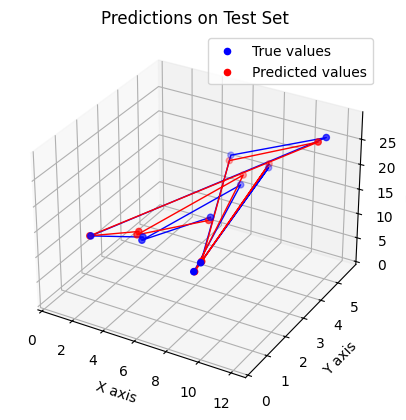

In [40]:
from utils.plot_maker_gaussian_process import plot_maker_3d

plot_maker_3d(np.array(y_test)[:10], np.array(y_test_pred)[:10], "Predictions on Test Set")

# Make Predictions on new data

In [41]:
test_data = pd.read_csv('../test-data/red_ball_coordinates_128px_2024-02-27_13h38m.csv', delimiter=',', decimal='.')
test_result = pd.read_csv('../test-data/positions_xyz_2024-02-27_13h38m.csv', delimiter=',', decimal='.')

In [42]:
new_combined = pd.concat([test_data, test_result], axis=1)
new_combined = new_combined.dropna(thresh=new_combined.shape[1]-3)
new_combined

,u0,v0,u1,v1,u2,v2,u3,v3,u4,v4,u5,v5,u6,v6,x,y,z
0,36.0,40.0,125.0,41.0,33.5,84.0,78.0,83.0,126.0,85.0,NaN,NaN,69.0,121.0,7.140000,3.070000,15
1,36.0,41.0,124.5,42.0,33.0,85.0,77.5,84.0,126.0,87.0,NaN,NaN,69.0,120.5,7.140000,3.070000,15
2,36.0,42.0,124.0,44.0,33.0,86.0,77.5,85.0,126.0,88.0,NaN,NaN,69.0,120.5,7.140000,3.070000,15
3,36.0,43.5,124.0,45.0,33.0,87.0,77.0,86.0,125.5,89.0,NaN,NaN,69.0,120.0,7.140000,3.070000,15
4,36.0,45.0,123.0,46.0,33.0,89.0,77.0,87.0,126.0,91.0,NaN,NaN,69.0,120.0,7.156666,3.169981,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,88.0,6.0,56.0,24.0,83.5,54.0,12.0,72.0,60.5,70.0,74.0,98.0,68.5,118.5,2.215740,0.114258,15
1470,88.5,6.0,56.5,24.0,83.5,54.0,11.5,71.0,60.5,70.0,74.0,98.0,68.5,118.5,2.218657,0.133010,15
1471,88.0,7.0,56.5,24.0,83.5,54.0,11.0,71.5,60.5,70.0,74.0,98.0,68.5,118.5,2.221629,0.155025,15
1472,88.0,7.0,56.5,24.0,83.5,54.5,11.0,71.5,60.5,70.0,74.0,98.0,68.5,118.5,2.224656,0.180281,15


In [43]:
new_X = new_combined.iloc[:, :14]
new_y = new_combined.iloc[:, 14:]
new_X.shape, new_y.shape

((896, 14), (896, 3))

In [44]:
new_X_imputed = imputer.fit_transform(new_X)

new_X_scaled = scaler_X.fit_transform(new_X_imputed)
new_y_scaled = scaler_y.fit_transform(new_y)

In [45]:
new_y_pred_scaled = model.predict(new_X_scaled)

In [46]:
new_y_pred = scaler_y.inverse_transform(new_y_pred_scaled)

In [47]:
new_mse, new_mae, new_r2 = evaluate_model(new_y, new_y_pred, "New Data")

Mean Squared Error on New Data Set: 0.23789285591583276
Mean Absolute Error on New Data Set: 0.4001055952323218
R2 Score on New Data set: 0.6386690041978452


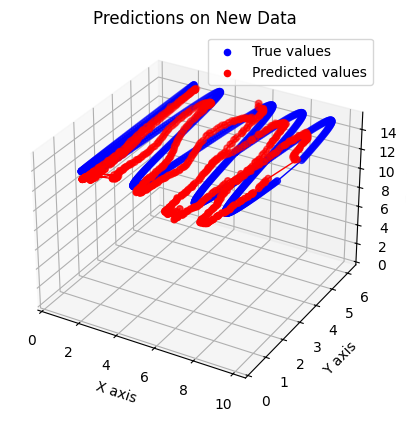

In [48]:
plot_maker_3d(np.array(new_y), np.array(new_y_pred), "Predictions on New Data")